In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/animals10

/content/drive/My Drive/animals10


In [0]:
!rm ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [0]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"thuntrnnguyn","key":"ae2fbe6a12b754ef390acd46beffea54"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

# ***1. DownLoad Data:***

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
!kaggle datasets download -d alessiocorrado99/animals10 

# ***2. Preprocessing***

In [0]:
!mkdir data

In [0]:
import zipfile

local_zip = '/content/drive/My Drive/animals10/animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(".")
zip_ref.close()

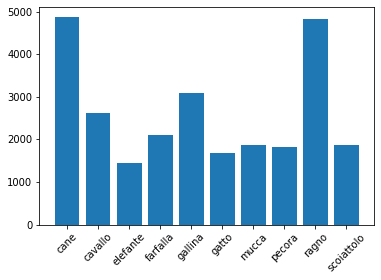

In [0]:
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

def barChart(data):
    """
    Agr:
    - data: type is the dictionary. Keys is the name of class, values is the numbers of elements in class.
    Return:
    - Bar chart of data
    """
    x_pos = [i for i, _ in enumerate(data.keys())]
    plt.bar(x_pos, data.values())
    plt.xticks(x_pos, data.keys(), rotation = 45)
    plt.show()
    
base_dir = '/content/drive/My Drive/animals10'
raw_data = os.path.join(base_dir, 'raw-img')
list_animal = os.listdir(raw_data)

num_of_each_animal = {}
for x in list_animal:
    tem = os.path.join(raw_data, x)
    num = os.listdir(tem)
    num_of_each_animal[x] = len(num)
barChart(num_of_each_animal)

Train-Val-Test = 70-10-20

In [0]:
import os
import shutil

def createDir(path, list_dir):
    """
    Agr:
    - path: là đường dẫn lưu các sub directory. This is a string.
    - list_dir: là danh sách các thư mục sẽ được tạo. This is a list.
    Return:
    - path of each directory in dict
    """
    path_of_dir = {}
    for x in list_dir:
        new_dir = os.path.join(path, x)
        if not os.path.exists(new_dir):
            os.mkdir(new_dir)
        path_of_dir[x] = new_dir
    return path_of_dir
def processRawData(raw_path, ratio, des_path):
    """
    Agr:
    - raw_path: this is the path of raw data.(string)
    - ratio: this is the ratio of train-val-test data.(list)
    - des_path: this is the path of save data is processed.(string)
    Return:
    - data is processed.
    """
    #Create data diretory
    data_dir = createDir(des_path, ['data'])['data']
    part_data = ['train', 'val', 'test']
    data_class = createDir(data_dir, part_data)
    #Create class directory
    raw_class = os.listdir(raw_path)
    path_of_class = {}
    for x in part_data:
        tem = createDir(data_class[x], raw_class)
        path_of_class[x] = tem
    #Div data
    for x in raw_class:
        raw_data_dir = os.path.join(raw_path, x)
        raw_data = os.listdir(raw_data_dir)

        train = int(len(raw_data)*ratio[0])
        val = int(len(raw_data)*(ratio[0] + ratio[1]))
        
        for y in raw_data[:train]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['train'][x])
        for y in raw_data[train:val]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['val'][x])
        for y in raw_data[val:]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['test'][x])
base_dir = '/content/drive/My Drive/animals10'
raw_dir = os.path.join(base_dir, 'raw-img')
processRawData(raw_dir, [0.7, 0.1, 0.2], base_dir)

In [0]:
def check(raw_dir, data_dir):
    raw_class = os.listdir(raw_dir)
    for x in raw_class:
        amount_raw = len(os.listdir(os.path.join(raw_dir, x)))
        amount_data = 0
        for y in ['train', 'val', 'test']:
            tem = os.path.join(data_dir, y)
            tem = os.path.join(tem, x)
            amount_data += len(os.listdir(tem))
        print(x, ":", amount_raw == amount_data, amount_data, amount_raw)
base_dir = '/content/drive/My Drive/animals10'
raw_dir = os.path.join(base_dir, 'raw-img')
data_dir = os.path.join(base_dir, 'data')
check(raw_dir, data_dir)

cane : True 4863 4863
cavallo : True 2623 2623
elefante : True 1446 1446
farfalla : True 2112 2112
gallina : True 3098 3098
gatto : True 1668 1668
mucca : True 1866 1866
pecora : True 1820 1820
ragno : True 4821 4821
scoiattolo : True 1862 1862


# ***3. Preprocessing image***

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
base_dir = '/content/drive/My Drive/animals10/data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
evaluation_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen  = ImageDataGenerator(rescale = 1./255)
evl_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (299, 299),
    batch_size = 50,
    class_mode = 'categorical')
validation_generation = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (299, 299),
    batch_size = 20,
    class_mode = 'categorical')
evaluation_generation = evl_datagen.flow_from_directory(
    evaluation_dir,
    target_size = (299, 299),
    batch_size = 20,
    class_mode = 'categorical',
    shuffle = False)

Found 18322 images belonging to 10 classes.
Found 2615 images belonging to 10 classes.
Found 5242 images belonging to 10 classes.


# ***4. Model:***

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model 

from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
pre_trained_model = InceptionV3(input_shape = (299, 299, 3), include_top = False)

In [0]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [0]:
last_layer = pre_trained_model.get_layer('mixed10')
last_output = last_layer.output

In [0]:
x=layers.AveragePooling2D(pool_size=(2, 2), strides=2)(last_output)
x=layers.AveragePooling2D(pool_size=(2, 2), strides=2)(x)
x=layers.AveragePooling2D(pool_size=(2, 2), strides=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)   
x = layers.Dense(10, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.0001),
              metrics=['acc'])

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 367,
    epochs = 20,
    validation_data = validation_generation,
    validation_steps = 131,
    verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 367 steps, validate for 131 steps
Epoch 1/20
367/367 [==============================] - 421s 1s/step - loss: 0.6195 - acc: 0.8257 - val_loss: 0.1341 - val_acc: 0.9663
Epoch 2/20
367/367 [==============================] - 399s 1s/step - loss: 0.3258 - acc: 0.9009 - val_loss: 0.1285 - val_acc: 0.9621
Epoch 3/20
367/367 [==============================] - 401s 1s/step - loss: 0.3089 - acc: 0.9056 - val_loss: 0.1223 - val_acc: 0.9675
Epoch 4/20
367/367 [==============================] - 399s 1s/step - loss: 0.2932 - acc: 0.9110 - val_loss: 0.1228 - val_acc: 0.9675
Epoch 5/20
367/367 [==============================] - 394s 1s/step - loss: 0.2843 - acc: 0.9108 - val_loss: 0.1322 - val_acc: 0.9656
Epoch 6/20
367/367 [==============================] - 394s 1s/step - loss: 0.2714 - acc: 0.9170 - val_loss: 0.1403 - val_acc: 0.9633
Epoch 7/20
367/367 [============

Lưu Model và lịch sử huấn luyện:

In [0]:
model.save('./model.h5')

In [0]:
import pickle
with open('./trainHistory', 'wb') as f:
    pickle.dump(history.history, f)

# ***5. Đánh giá***

Text(0.5, 1.0, 'Training and validation loss')

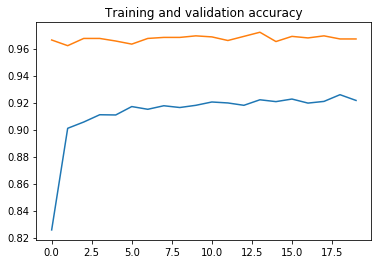

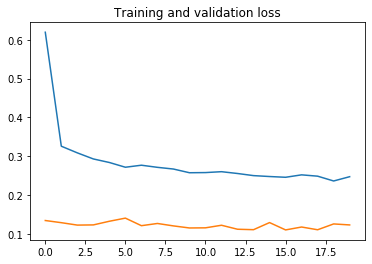

In [0]:
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import pickle
with open('./trainHistory', 'rb') as f:
    history = pickle.load(f)
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history['acc']
val_acc = history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history['loss']
val_loss = history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
def draw_heatmap_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)

    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    thresol = cm.max()*0.7 + cm.min()*0.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresol else "black")
    plt.colorbar()

    plt.title("Confusion matrix")
    plt.ylabel("True lable", rotation = 90)
    plt.xlabel("Predict lable")
"""
evaluation_generation.reset()
Y_pred = model.predict_generator(evaluation_generation)
classes = evaluation_generation.classes[evaluation_generation.index_array]
y_pred = np.argmax(Y_pred, axis=-1)
"""

'\nevaluation_generation.reset()\nY_pred = model.predict_generator(evaluation_generation)\nclasses = evaluation_generation.classes[evaluation_generation.index_array]\ny_pred = np.argmax(Y_pred, axis=-1)\n'

Instructions for updating:
Please use Model.predict, which supports generators.
Classification Report
              precision    recall  f1-score   support

        cane       0.99      0.97      0.98       973
     cavallo       0.95      0.98      0.96       525
    elefante       1.00      0.97      0.98       290
    farfalla       0.99      0.99      0.99       423
     gallina       0.99      0.99      0.99       620
       gatto       0.98      0.92      0.95       334
       mucca       0.87      0.97      0.92       374
      pecora       0.94      0.92      0.93       365
       ragno       0.99      0.99      0.99       965
  scoiattolo       0.98      0.98      0.98       373

    accuracy                           0.97      5242
   macro avg       0.97      0.97      0.97      5242
weighted avg       0.97      0.97      0.97      5242



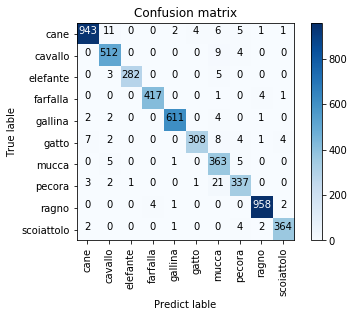

In [0]:
evaluation_generation.reset()
Y_true = evaluation_generation.labels

Y_pred = model.predict_generator(evaluation_generation, steps = 263)
y_pred = np.argmax(Y_pred, axis=-1)

base_dir = '/content/drive/My Drive/Data/animal-10/data'
evaluation_dir = os.path.join(base_dir, 'test')
target_names = os.listdir(evaluation_dir)
draw_heatmap_confusion_matrix(Y_true, y_pred, target_names)
print('Classification Report')
print(classification_report(evaluation_generation.classes, y_pred, target_names=target_names))

In [0]:
score = model.evaluate_generator(evaluation_generation, steps = 263)
print("loss:", score[0])
print("acc:", score[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
loss: 0.11158140405560264
acc: 0.97195727


# Nhận diện ảnh

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.models import load_model
import numpy as np 
model = load_model('./model.h5')

Saving 3.jpeg to 3 (2).jpeg
Chicken


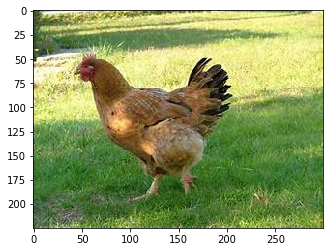

In [11]:



from PIL import Image


from google.colab import files
f = files.upload()
import matplotlib.pyplot as plt

path=''
for fn in f.keys():
  path=fn

img = Image.open(path)
plt.imshow(img)
img = np.array(img.resize((299, 299)))/225.0
x = np.expand_dims(img, axis = 0)
labels = np.argmax(model.predict(x))
if labels==0:
  print('Dog')
if labels==1:
  print('Horse')
if labels==2:
  print('Elephant')
if labels==3:
  print('Butterfly')
if labels==4:
  print('Chicken')
if labels==5:
  print('Cat')
if labels==6:
  print('Cow')
if labels==7:
  print('Sheep')
if labels==8:
  print('Spyder')
if labels==9:
  print('Squirrel')

# Đóng chương trình

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)